In [1]:
import random
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Loading Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
Y_train = Y_train/255.0
X_test = X_test/255.0
Y_test = Y_test/255.0

In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


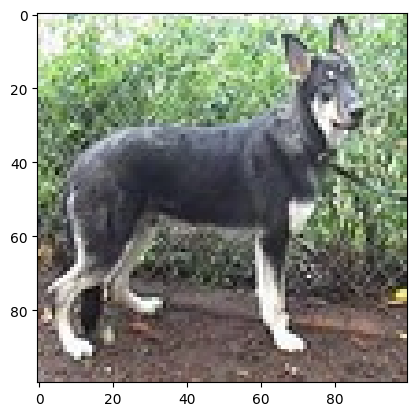

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\ankit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Alternative Way of Creating a Model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train,Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.5030 - loss: 0.1110
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - accuracy: 0.4894 - loss: 0.0161
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - accuracy: 0.4937 - loss: 0.0145
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.4914 - loss: 0.0145
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.4905 - loss: 0.0143


In [10]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7916 - loss: 0.0065 


[0.014435394667088985, 0.5]

Making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.00045921]]
Our model says it is a: dog [[0.00045921]]


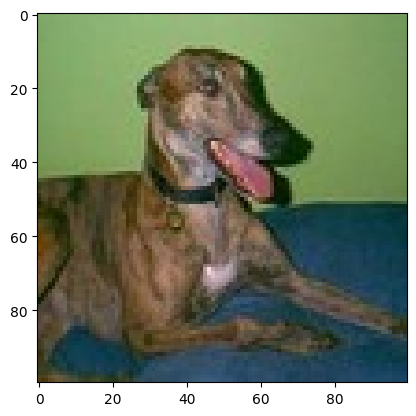

In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])


y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
# y_pred = y_pred > 0.5

if (y_pred > 0.001):
    pred = 'cat'
else:
    pred = 'dog'

print('Our model says it is a:', pred, y_pred)